In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Pregnancies: Number of times pregnant
#### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### BloodPressure: Diastolic blood pressure (mm Hg)
#### SkinThickness: Triceps skin fold thickness (mm)
#### Insulin: 2-Hour serum insulin (mu U/ml)
#### BMI: Body mass index (weight in kg/(height in m)^2)
#### DiabetesPedigreeFunction: Diabetes pedigree function
#### Age: Age (years)
#### Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0
##### source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv'
df=pd.read_csv(url)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


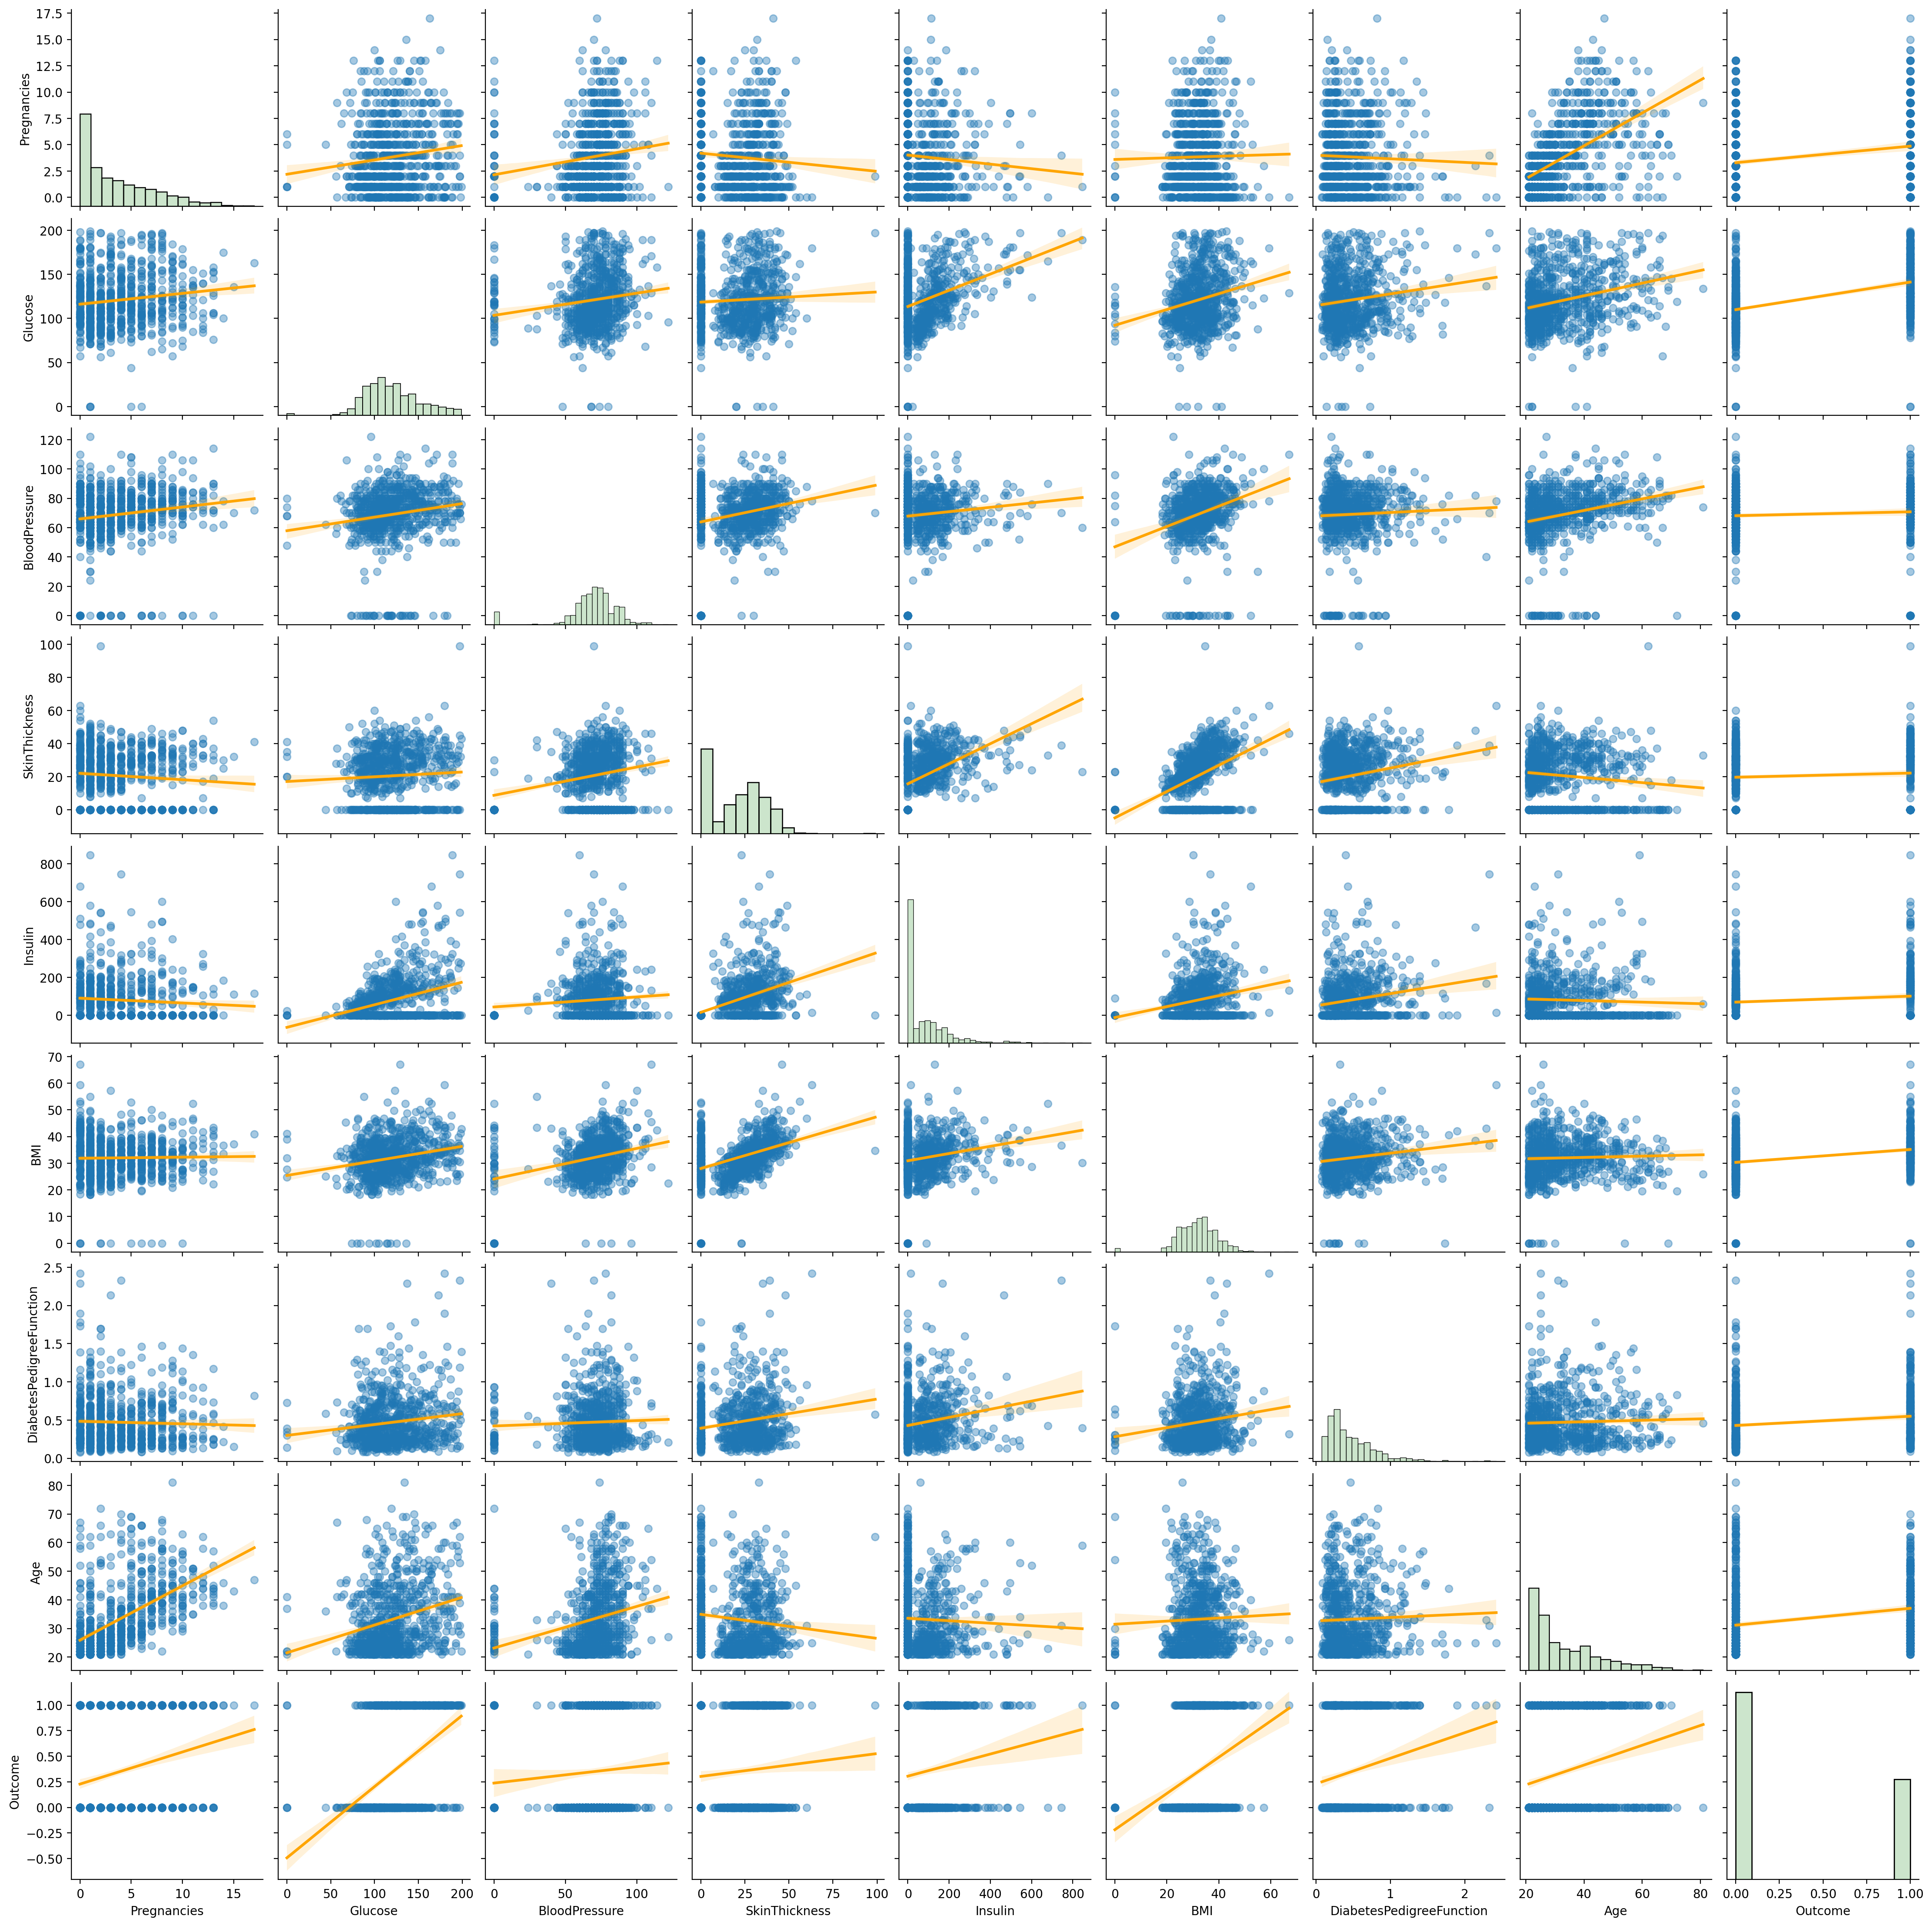

In [5]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

### 1. Select importance features
#### DecisionTreeClassifier (random_state = 7)

In [57]:
# model= DecisionTreeClassifier(random_state=7)
model= RandomForestClassifier(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']
model.fit(X,y)

RandomForestClassifier(n_estimators=250, random_state=7)

In [10]:
model.feature_importances_

array([0.084649  , 0.25538214, 0.08686371, 0.06915221, 0.07227062,
       0.16934724, 0.12464596, 0.13768912])

In [11]:
fs=pd.Series(model.feature_importances_, index= X.columns).sort_values(ascending=True)
fs

SkinThickness               0.069152
Insulin                     0.072271
Pregnancies                 0.084649
BloodPressure               0.086864
DiabetesPedigreeFunction    0.124646
Age                         0.137689
BMI                         0.169347
Glucose                     0.255382
dtype: float64

In [13]:
#sum is equal to 1
fs.sum()

1.0

<AxesSubplot:>

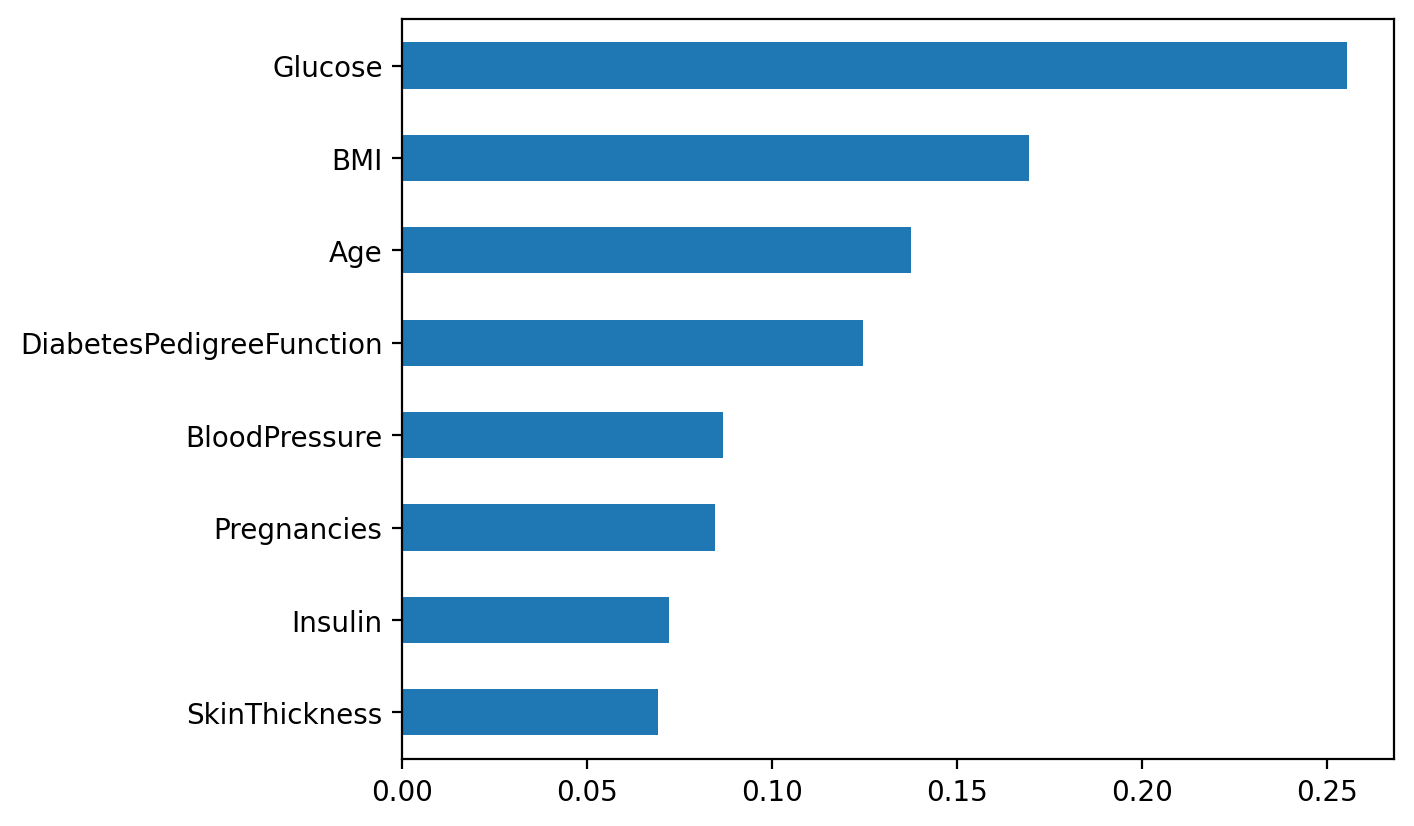

In [16]:
fs.plot(kind='barh')

In [34]:
#select only features that has values > 0.1
fs[fs > .1]

DiabetesPedigreeFunction    0.124646
Age                         0.137689
BMI                         0.169347
Glucose                     0.255382
dtype: float64

In [44]:
X=df[fs[fs> .1].index]
y=df['Outcome']

In [45]:
X.head()

DiabetesPedigreeFunction  Age   BMI  Glucose
0                     0.627   50  33.6      148
1                     0.351   31  26.6       85
2                     0.672   32  23.3      183
3                     0.167   21  28.1       89
4                     2.288   33  43.1      137

### 2. Model Training

In [46]:
#split train test 30%
test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=test_size,
                                                   stratify=y, #แบ่งสัดส่วนเท่ากัน
                                                   random_state=7)

In [50]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'], 
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'], 
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

#print(model_scores)
print(f'best score = {max(model_scores)}')    

C:\Users\nirac\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nirac\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier score: 0.7403
[[125  25]
 [ 35  46]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.65      0.57      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.74      0.74       231

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.7879
[[137  13]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       150
           1       0.78      0.56      0.65        81

    accuracy                           0.79       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.79      0.79      0.78       231

----------------------------------------------------------------------------------------------------
Perceptron           score: 

In [52]:
model_scores

[[0.7402597402597403, 'KNeighborsClassifier'],
 [0.7878787878787878, 'LogisticRegression'],
 [0.5584415584415584, 'Perceptron'],
 [0.7056277056277056, 'DecisionTreeClassifier'],
 [0.7532467532467533, 'GradientBoostingClassifier'],
 [0.7489177489177489, 'RandomForestClassifier'],
 [0.7316017316017316, 'BaggingClassifier'],
 [0.7359307359307359, 'AdaBoostClassifier'],
 [0.7835497835497836, 'GaussianNB'],
 [0.683982683982684, 'MLPClassifier'],
 [0.7792207792207793, 'SVC_linear'],
 [0.6883116883116883, 'GaussianProcessClassifier']]

In [56]:
df_score=pd.DataFrame(model_scores,
                     columns=['Score','Classifier'])
df_score.sort_values('Score',ascending=False)
                     

Score                  Classifier
1   0.787879          LogisticRegression
8   0.783550                  GaussianNB
10  0.779221                  SVC_linear
4   0.753247  GradientBoostingClassifier
5   0.748918      RandomForestClassifier
0   0.740260        KNeighborsClassifier
7   0.735931          AdaBoostClassifier
6   0.731602           BaggingClassifier
3   0.705628      DecisionTreeClassifier
11  0.688312   GaussianProcessClassifier
9   0.683983               MLPClassifier
2   0.558442                  Perceptron